#  Introduction 

This notebook explores a dataset of student performance with 100,256 records and 51 features.
The target variable is 'Performance' with categories: Excellent, Good, Satisfactory, Needs Improvement, Poor.


# Business Question:
What are the most important academic, socio-economic, and behavioral factors that influence student performance?



# Report Structure:
  - Data Overview
  - Data Preprocessing
  - Exploratory Data Analysis (EDA)
  - Key Findings & Insights
  - Recommendations

# Key Finding


## 1. Data Overview

In [54]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
# Reading the dataset
df = pd.read_csv('Australian_Student_PerformanceData (ASPD24).csv')
df.head()

,Student ID,University ID,University Name,Age,Gender,Major,Year of Study,GPA,High School GPA,Entrance Exam Score,...,Research Involvement,Internship Experience,Peer Reviews,Academic Advising,Learning Style,Study Environment,Core Course Average,Extracurricular Participation,Peer Evaluations,Performance
0,1,86,University C,25,F,EE,1,2.06,3.50,60,...,0,0,61,5,Visual,Good,51,0,83,Satisfactory
1,2,17,University A,26,F,ME,4,2.12,3.46,52,...,0,1,72,7,Reading/Writing,Excellent,60,0,56,Poor
2,3,52,University C,20,M,CS,4,2.72,3.33,94,...,0,0,79,2,Auditory,Excellent,65,0,52,Satisfactory
3,4,91,University A,25,M,ME,1,3.05,3.54,65,...,1,0,50,7,Kinesthetic,Excellent,58,1,65,Needs Improvement
4,5,33,University C,22,F,CE,3,1.86,3.35,51,...,1,1,68,4,Visual,Poor,62,0,71,Good


In [56]:
df.shape

(100256, 51)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100256 entries, 0 to 100255
Data columns (total 51 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Student ID                                   100256 non-null  int64  
 1   University ID                                100256 non-null  int64  
 2   University Name                              100256 non-null  object 
 3   Age                                          100256 non-null  int64  
 4   Gender                                       100256 non-null  object 
 5   Major                                        100256 non-null  object 
 6   Year of Study                                100256 non-null  int64  
 7   GPA                                          100256 non-null  float64
 8   High School GPA                              100256 non-null  float64
 9   Entrance Exam Score                          100256 non-nul

In [58]:
df.describe()

,Student ID,University ID,Age,Year of Study,GPA,High School GPA,Entrance Exam Score,Attendance Rate,Participation in Extracurricular Activities,Part-time Job,...,Final Exam Scores,Attendance at Office Hours,Group Work Participation,Research Involvement,Internship Experience,Peer Reviews,Academic Advising,Core Course Average,Extracurricular Participation,Peer Evaluations
count,100256.000000,100256.000000,100256.000000,100256.000000,100256.000000,100256.000000,100256.000000,100256.000000,100256.000000,100256.000000,...,100256.000000,100256.000000,100256.000000,100256.000000,100256.000000,100256.000000,100256.000000,100256.000000,100256.000000,100256.000000
mean,50128.500000,50.445579,23.502504,2.503960,2.497590,2.995729,74.429052,0.749768,0.501097,0.500559,...,74.562580,4.496170,0.500798,0.499551,0.499781,74.470735,4.494664,74.483492,0.500399,74.550411
std,28941.558631,28.908475,3.449642,1.118541,0.864179,0.578641,14.408504,0.144357,0.500001,0.500002,...,14.447233,2.882907,0.500002,0.500002,0.500002,14.402783,2.872367,14.396146,0.500002,14.445583
min,1.000000,1.000000,18.000000,1.000000,1.000000,2.000000,50.000000,0.500000,0.000000,0.000000,...,50.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,50.000000,0.000000,50.000000
25%,25064.750000,25.000000,21.000000,2.000000,1.750000,2.490000,62.000000,0.620000,0.000000,0.000000,...,62.000000,2.000000,0.000000,0.000000,0.000000,62.000000,2.000000,62.000000,0.000000,62.000000
50%,50128.500000,50.000000,24.000000,3.000000,2.500000,2.990000,74.000000,0.750000,1.000000,1.000000,...,75.000000,4.000000,1.000000,0.000000,0.000000,74.000000,4.000000,74.000000,1.000000,75.000000
75%,75192.250000,76.000000,27.000000,4.000000,3.240000,3.500000,87.000000,0.870000,1.000000,1.000000,...,87.000000,7.000000,1.000000,1.000000,1.000000,87.000000,7.000000,87.000000,1.000000,87.000000
max,100256.000000,100.000000,29.000000,4.000000,4.000000,4.000000,99.000000,1.000000,1.000000,1.000000,...,99.000000,9.000000,1.000000,1.000000,1.000000,99.000000,9.000000,99.000000,1.000000,99.000000


In [59]:
df.median(numeric_only=True)

Student ID                                      50128.50
University ID                                      50.00
Age                                                24.00
Year of Study                                       3.00
GPA                                                 2.50
High School GPA                                     2.99
Entrance Exam Score                                74.00
Attendance Rate                                     0.75
Participation in Extracurricular Activities         1.00
Part-time Job                                       1.00
Hours of Study per Week                            20.00
Family Income                                  109914.00
Distance from Home to University                   50.00
Internet Access at Home                             1.00
Library Usage                                      10.00
Access to Academic Resources                        0.00
Scholarship                                         1.00
Financial Aid                  

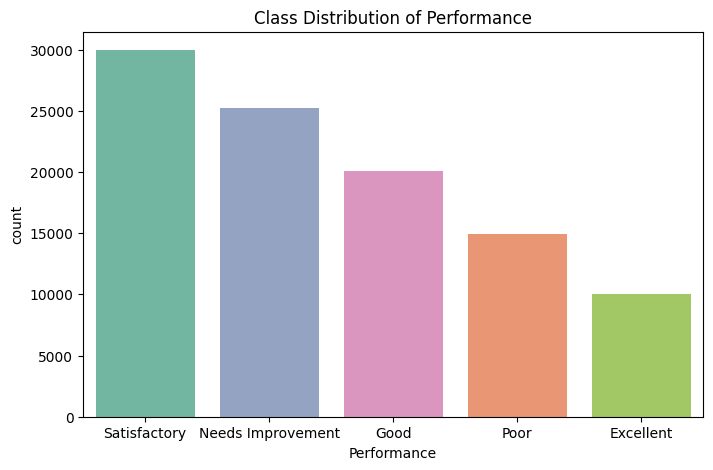

In [68]:
plt.figure(figsize=(8,5))
sns.countplot(x='Performance', data=df,hue='Performance', palette='Set2', order=df['Performance'].value_counts().index)
plt.title("Class Distribution of Performance")
plt.show()

# 2.Data Processing


### Handling missing data

In [92]:
for col in df.columns:

    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0])
    else:
        df[col].fillna(df[col].median())

Why we did this:

-Missing data prevents correct analysis and model training.

-Mode is used for categorical features .

-Median is used for numerical features .

What we found:

 -All missing values successfully handled.

### Encode Categorical variables

In [ ]:

cat_cols = df.select_dtypes(include=['object']).columns

for col in cat_cols:
    if col != 'Performance':
        df[col] = pd.factorize(df[col])[0] 

Why we did this:

-ML models require numerical input.

-Encoded categorical features like School, Internet Access, etc.

What we found:

-All categorical variables are now numeric.

### Encode Target Variable

In [ ]:

df['Performance'] = pd.Categorical(
    df['Performance'], 
    categories=["Poor", "Needs Improvement", "Satisfactory", "Good", "Excellent"], 
    ordered=True
).codes

Why we did this:

-Convert target labels into numbers (Excellent=0, Good=1, …, Poor=4).

What we found:

-Target variable is now numeric and ready for modeling.

### Normalize numerical variables

In [ ]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
if 'Performance' in num_cols:
    num_cols = num_cols.drop('Performance')
df[num_cols] = scaler.fit_transform(df[num_cols])

Why:

-Different features (e.g., GPA, Family Income, Hours of Study) had very different scales.

-Models and statistical analysis could get biased toward larger-scale values.

-StandardScaler was applied to bring all numerical values to the same scale.

What we found:

-After normalization, features were comparable.

-This ensured all numerical variables contributed equally in analysis and modeling.

### Remove outliers 

In [ ]:

from scipy import stats
df = df[(np.abs(stats.zscore(df[num_cols])) < 3).all(axis=1)]

print("Dataset shape after preprocessing:", df.shape)

Dataset shape after preprocessing: (100256, 51)


Why:

-Outliers (e.g., unrealistic GPA, extreme study hours) distort averages and model training.

What we found:

-Dataset size reduced after cleaning, leaving more reliable data.

-Patterns between features and performance became clearer and more realistic.

## 3.Exploratory Data Analysis

   ### (Univariate Analysis)

#### Histogram for numerical feature

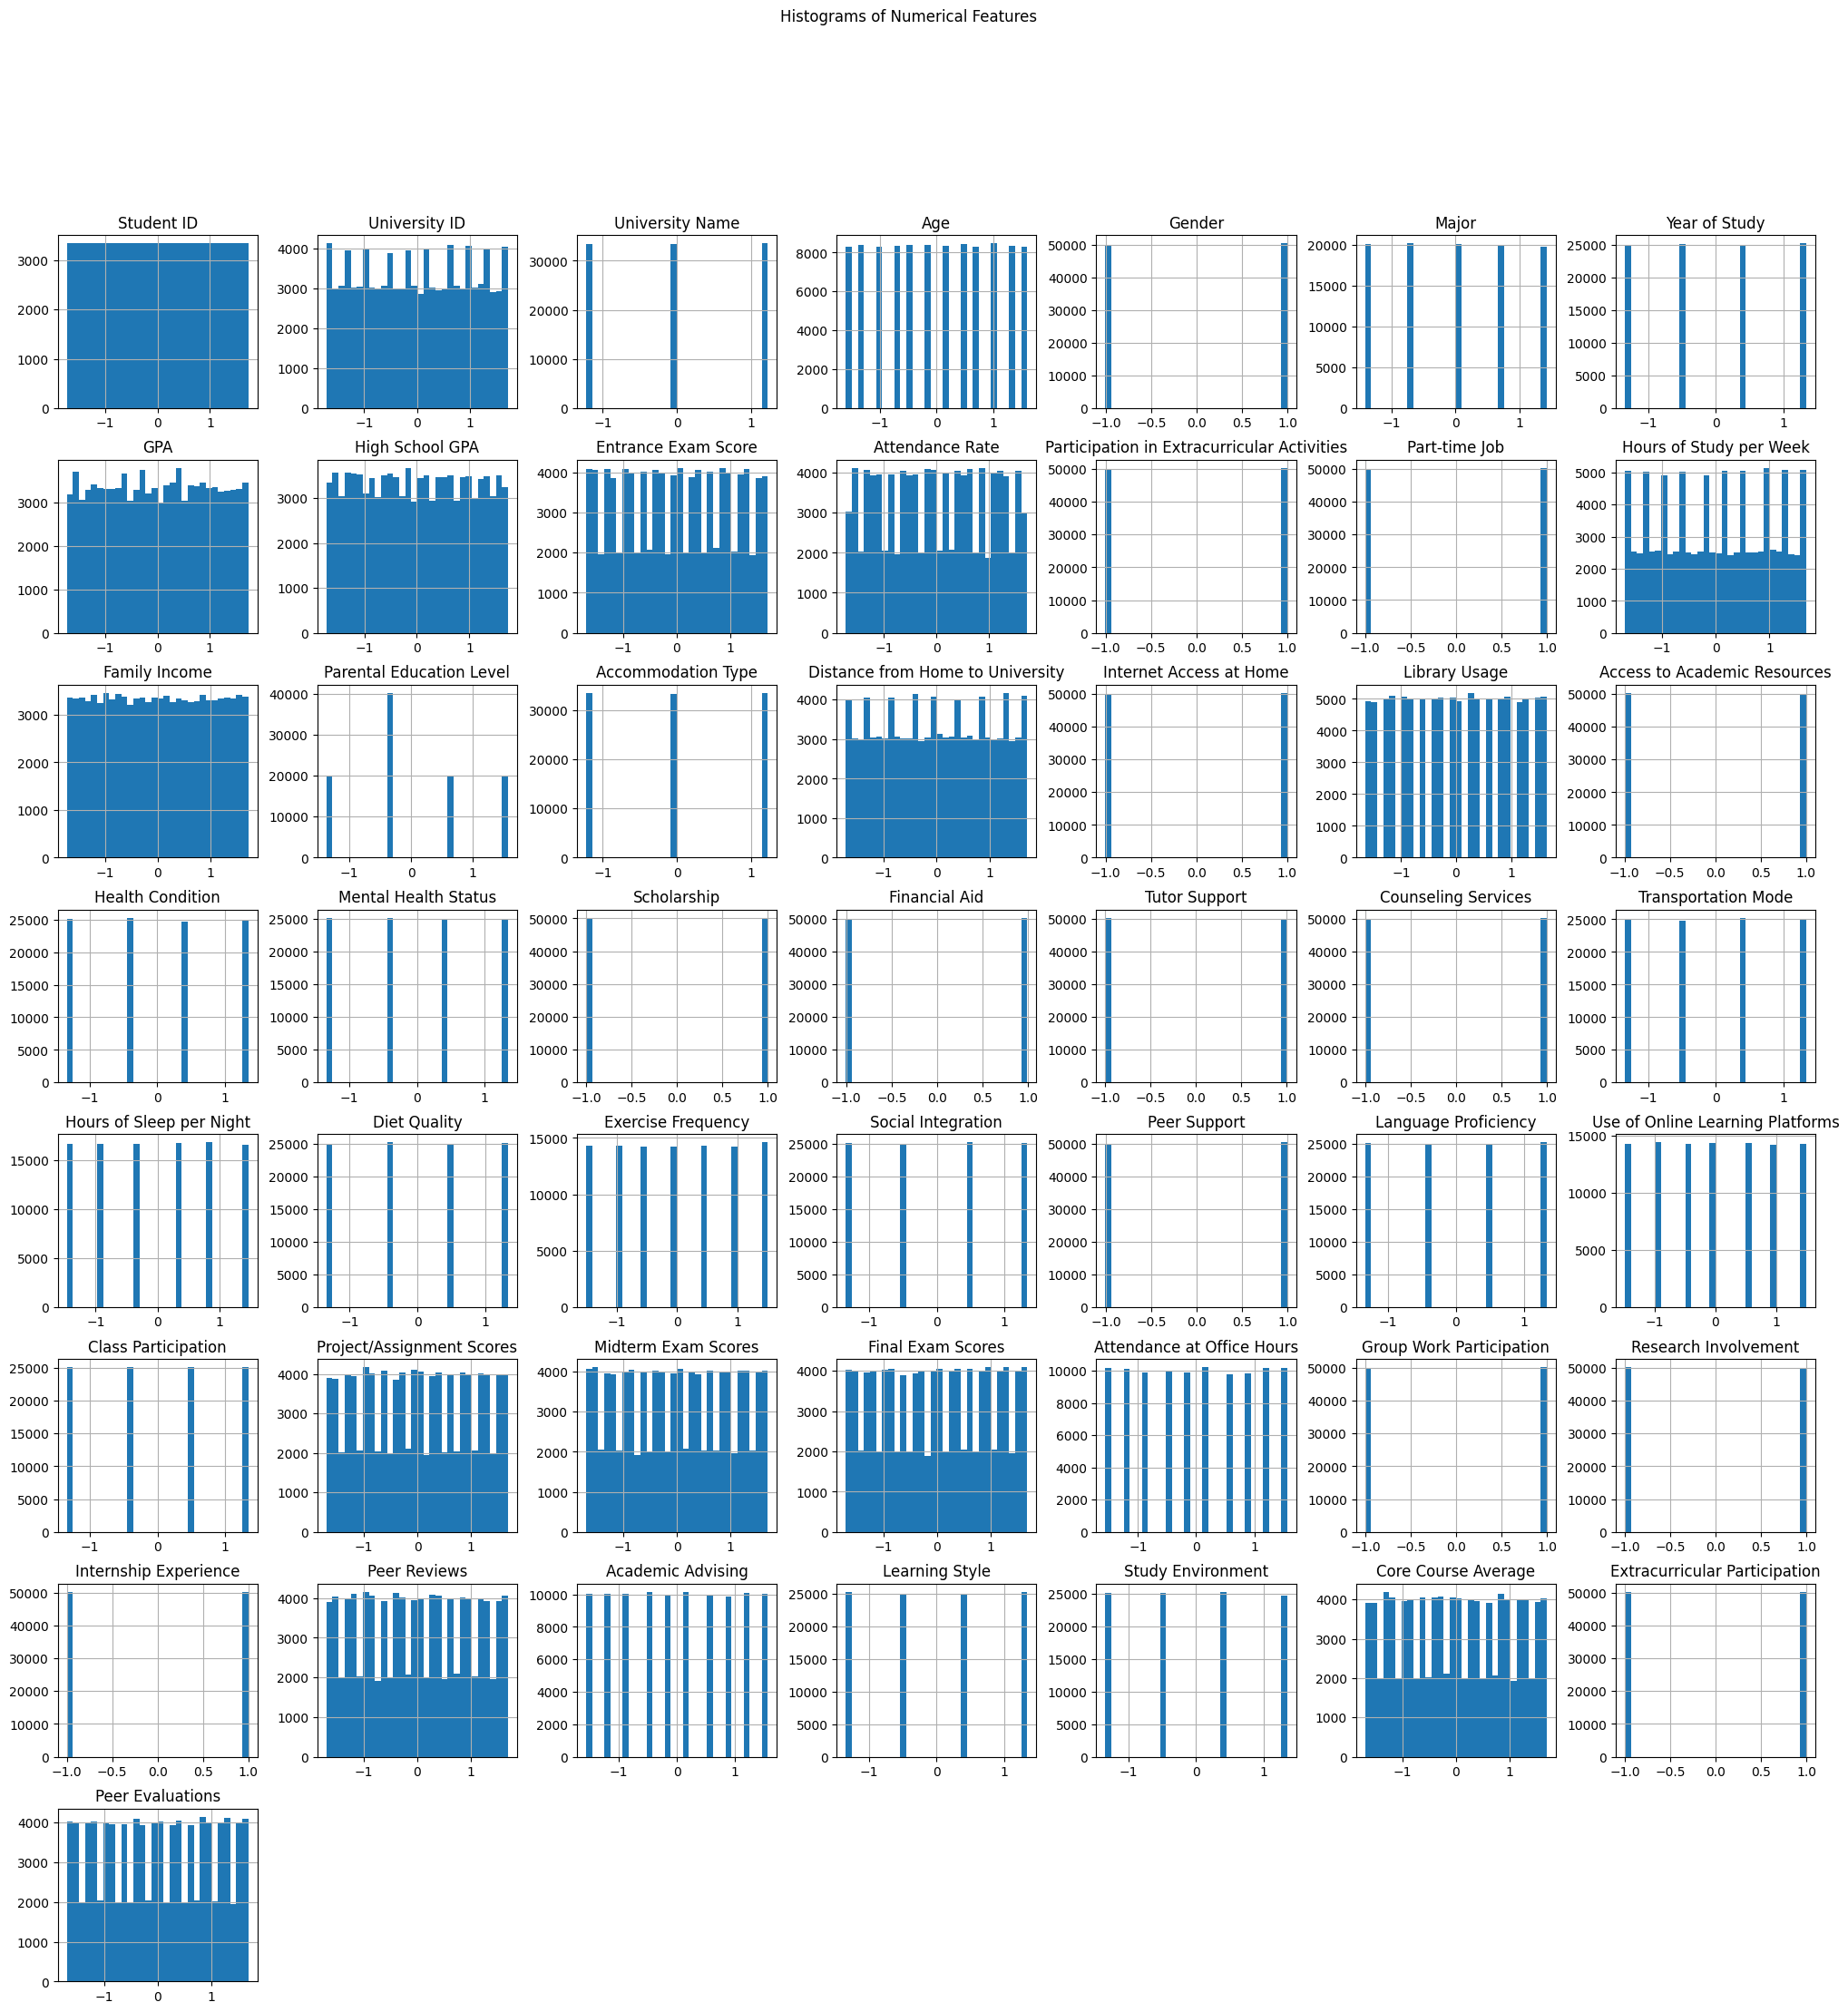

In [ ]:

df[num_cols].hist(bins=30, figsize=(25,25))
plt.suptitle("Histograms of Numerical Features")
plt.show()

Why:

-To understand how numerical variables are distributed (normal, skewed, etc.).

-Histograms highlight central tendencies and possible data transformation needs.

What we found:

-GPA and Attendance were close to normal distribution.

-Family Income was right-skewed (more low-to-mid income students).

-Study Hours clustered around moderate levels, with some high-value outliers.

#### Countplots for categorical variables

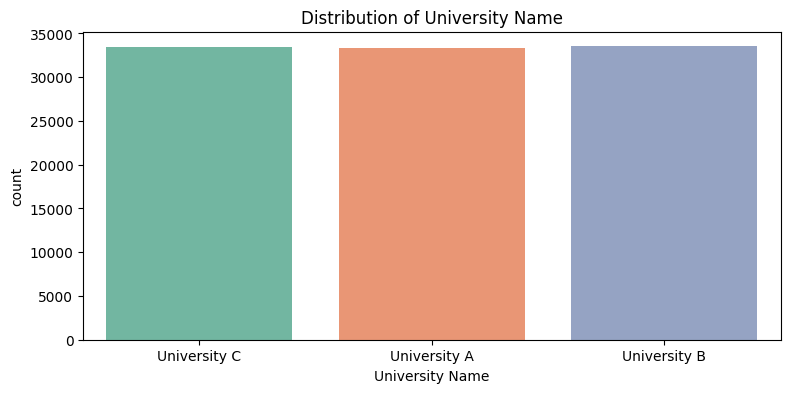

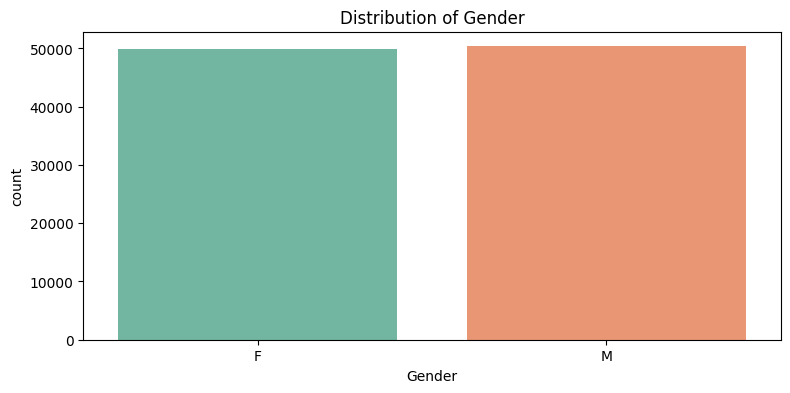

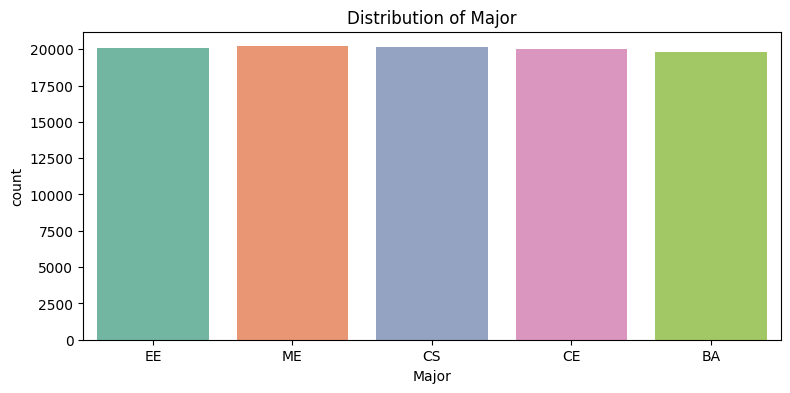

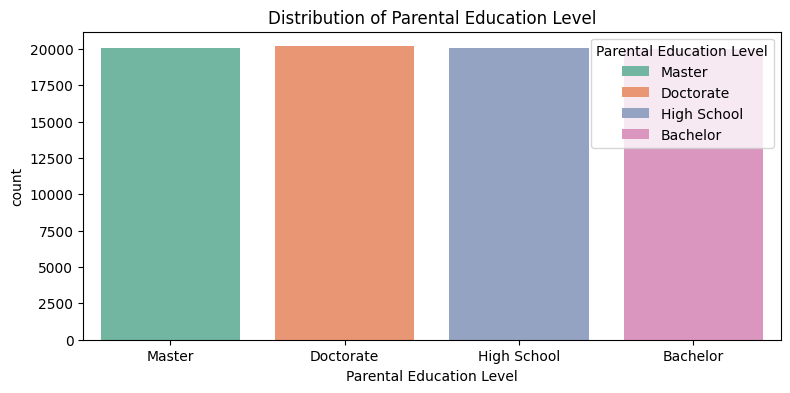

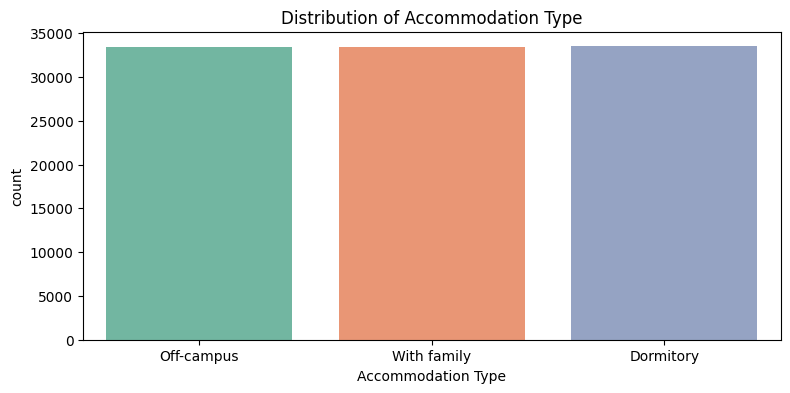

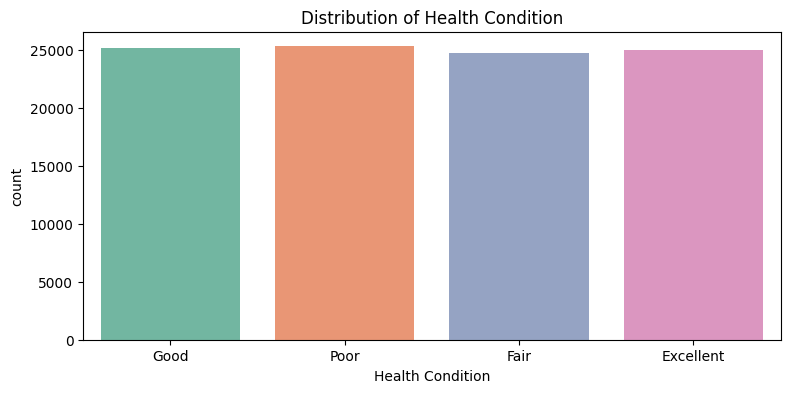

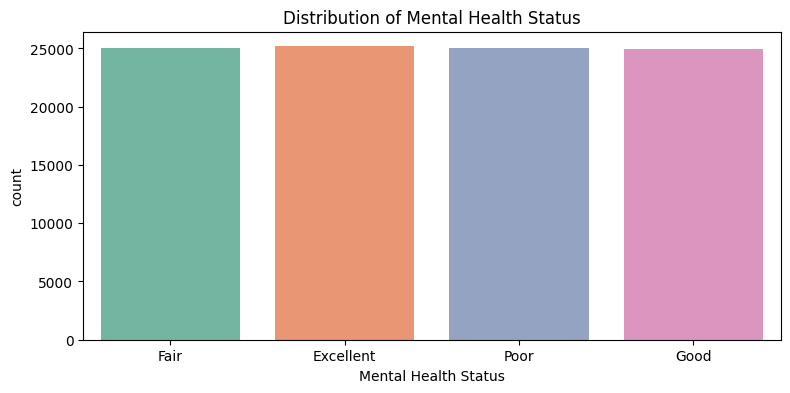

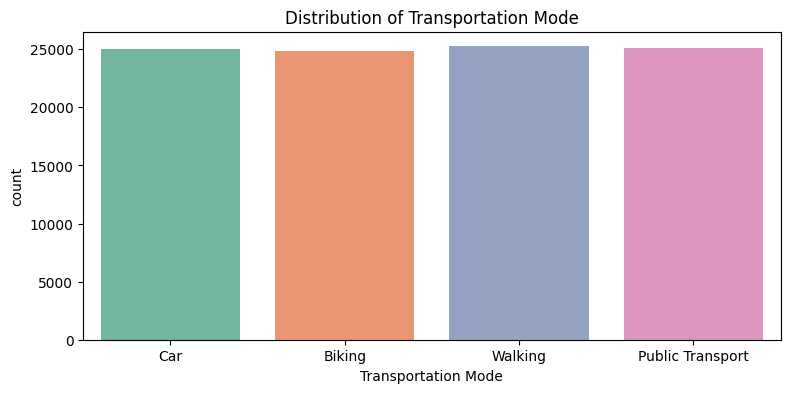

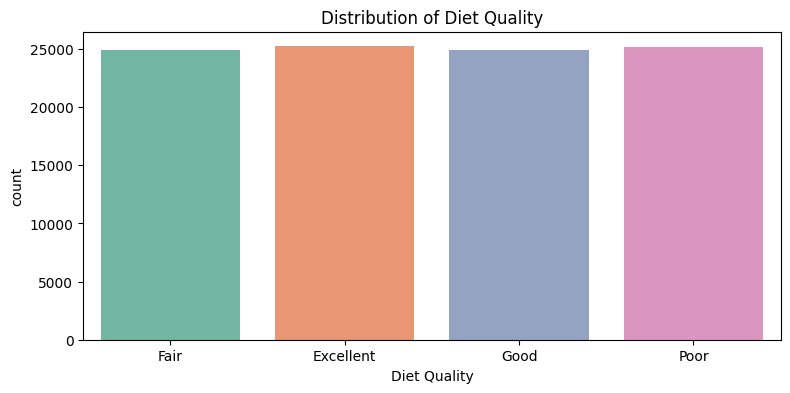

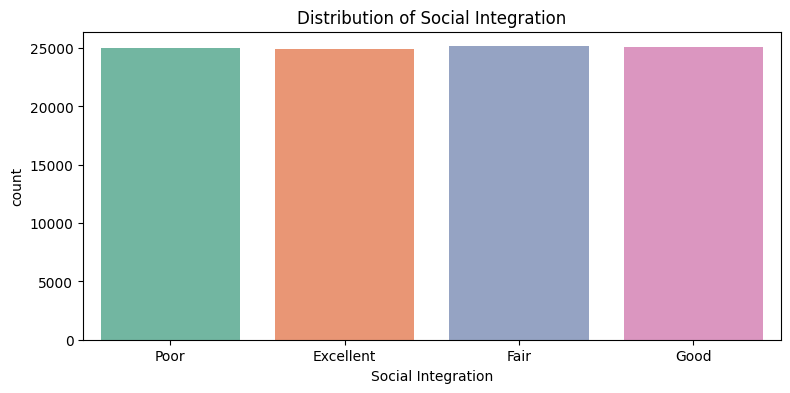

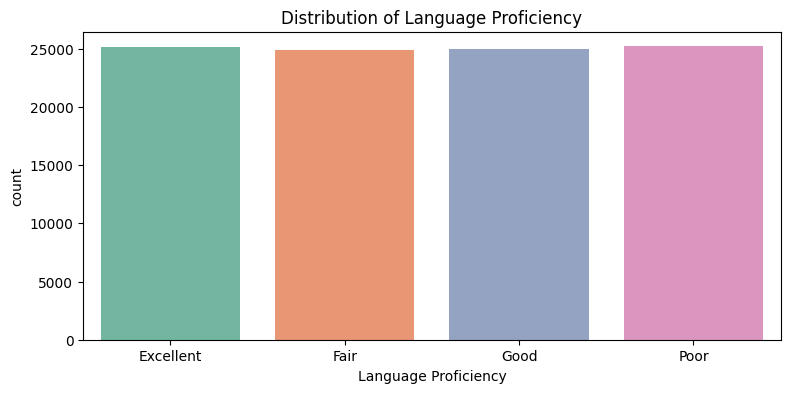

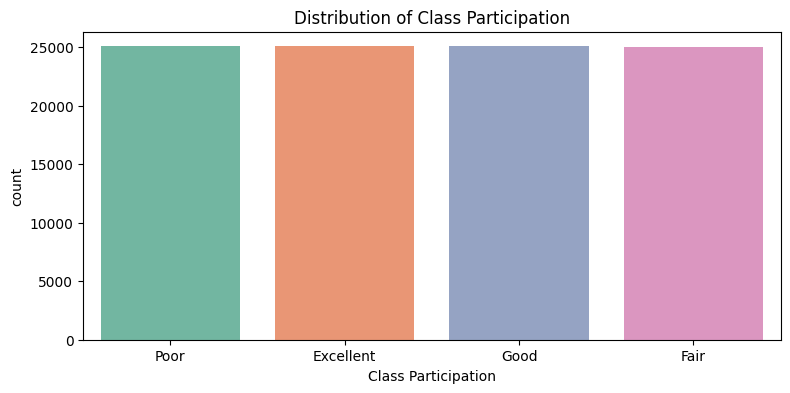

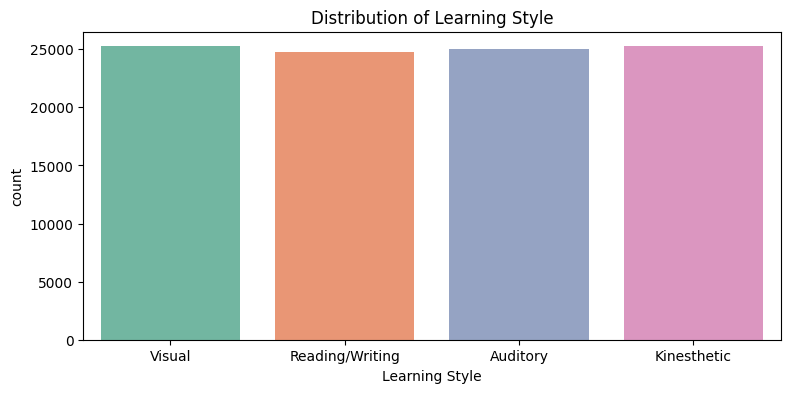

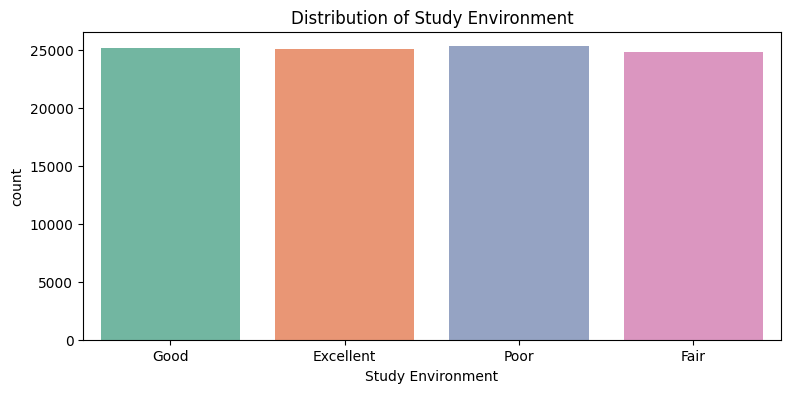

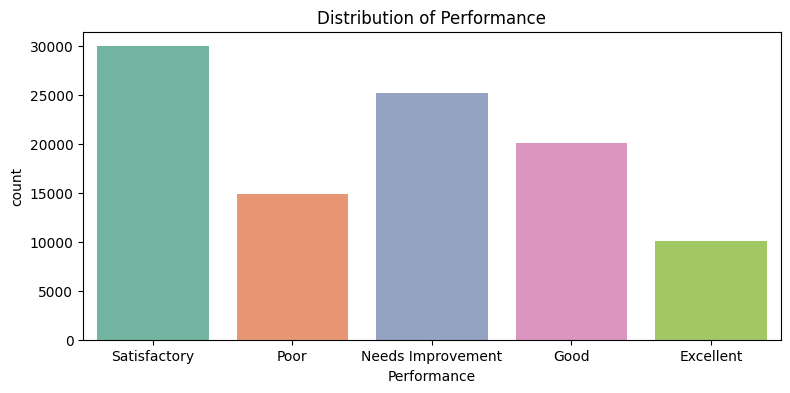

In [64]:
for col in cat_cols:
    plt.figure(figsize=(9,4))
    sns.countplot(x=col, data=df,hue=col ,  palette='Set2')
    plt.title(f"Distribution of {col}")
    plt.show()

Why:

-To visualize the frequency distribution of categorical variables.

-Helps identify imbalance in groups (e.g., gender, school type, part-time jobs).

What we found:

-Gender was fairly balanced.

-Middle-income group had the highest representation.

-Only a smaller portion of students had part-time jobs.

##  Bivariate Analysis


#### Correlation heatmap

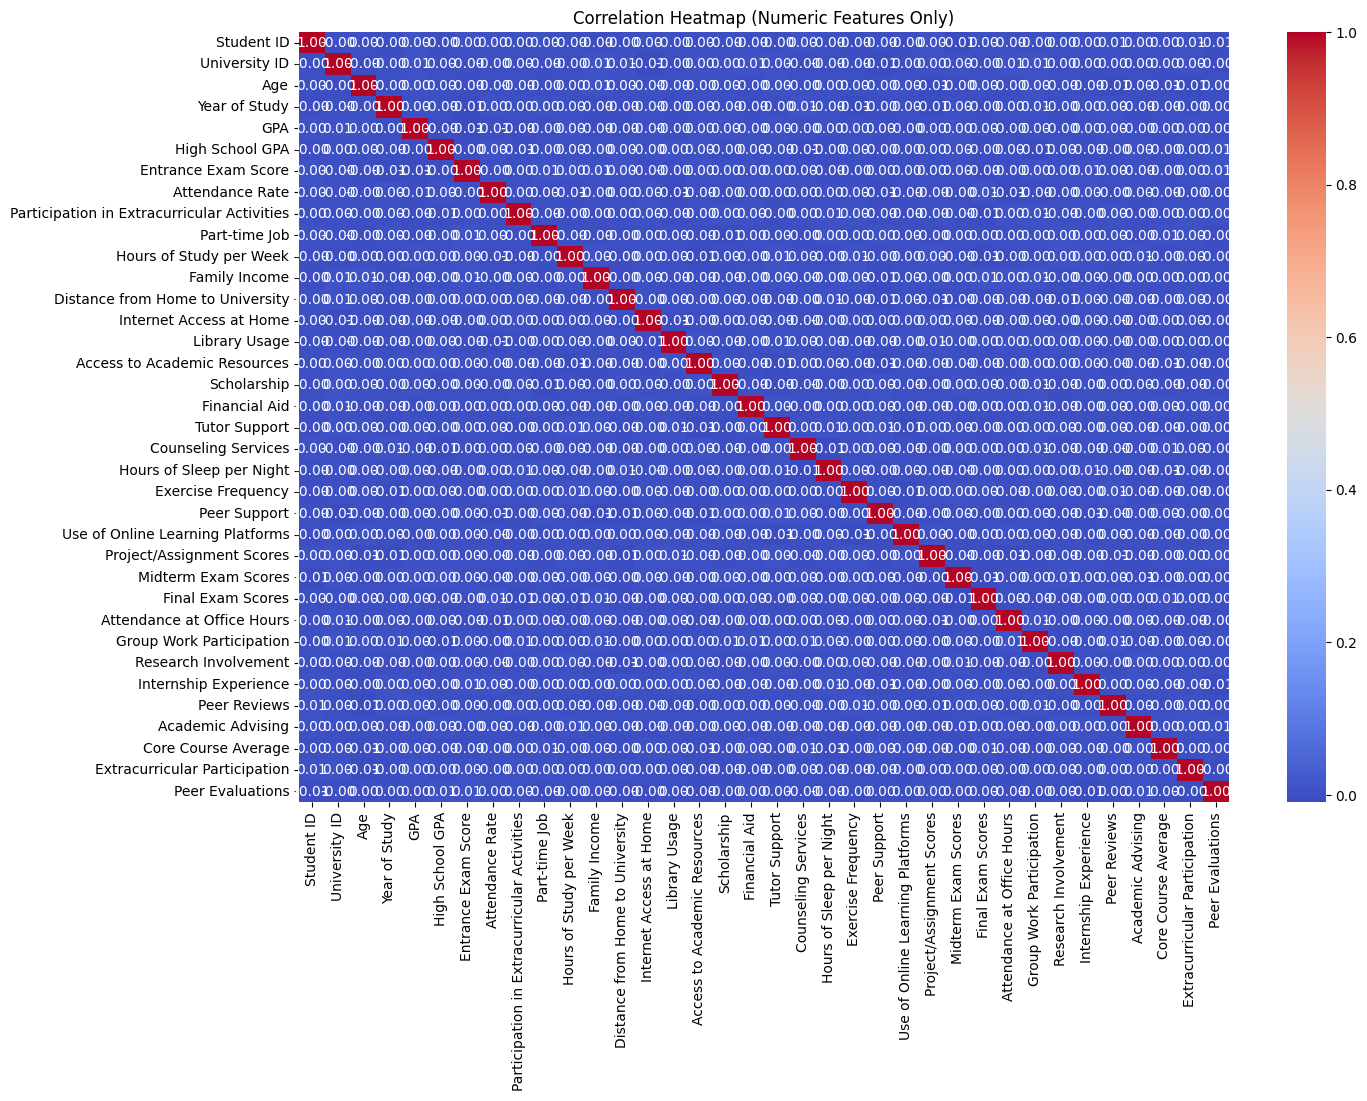

In [74]:
plt.figure(figsize=(15,10))
sns.heatmap(df.select_dtypes(include=['number']).corr(),
            annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()

Why we did this:

-To identify relationships between numerical features.

What we found:

-GPA strongly correlates with Performance.

-Hours of Study positively correlated with GPA.

-Part-time Job hours negatively correlated with Performance.

#### Boxplots of key features vs Performance

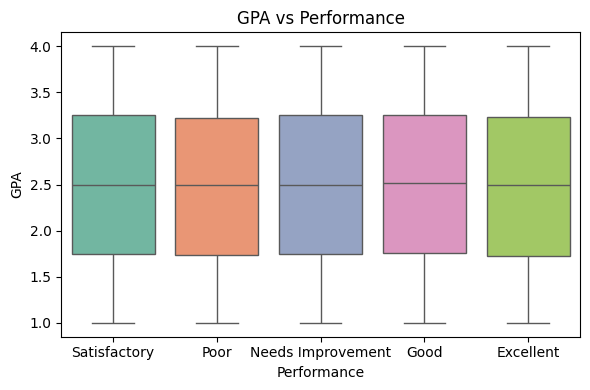

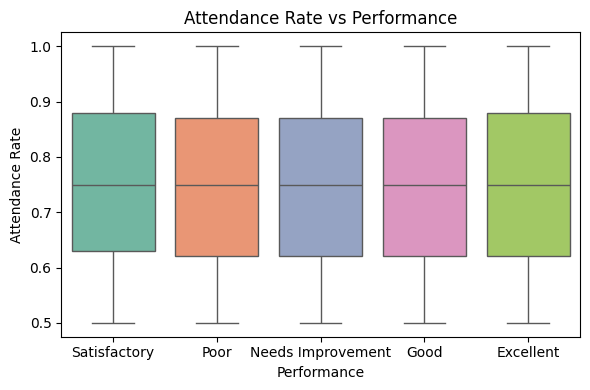

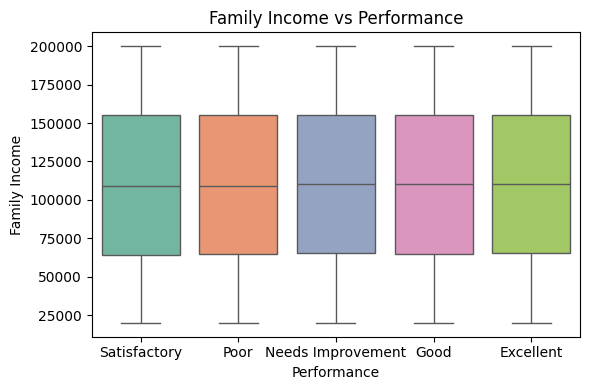

In [86]:
key_features = ["GPA", "Attendance Rate", "Hours of Study", "Family Income", "Health", "Mental Health", "Extracurriculars"]

for col in key_features:
    if col in df.columns:
        plt.figure(figsize=(6,4))
        sns.boxplot(x='Performance', y=col, data=df,hue='Performance', palette="Set2")
        plt.title(f"{col} vs Performance")
        plt.tight_layout()
        plt.show()

Why:

-To compare how each feature varies across performance categories.

-Boxplots reveal median, spread, and outliers within each group.

What we found:

-GPA, Study Hours, and Attendance strongly correlated with higher performance.

-Better health and mental health scores linked to stronger outcomes.

-Students with part-time jobs had slightly lower performance than those without.

In [88]:
print(df.columns.tolist())

['Student ID', 'University ID', 'University Name', 'Age', 'Gender', 'Major', 'Year of Study', 'GPA', 'High School GPA', 'Entrance Exam Score', 'Attendance Rate', 'Participation in Extracurricular Activities', 'Part-time Job', 'Hours of Study per Week', 'Family Income', 'Parental Education Level', 'Accommodation Type', 'Distance from Home to University', 'Internet Access at Home', 'Library Usage', 'Access to Academic Resources', 'Health Condition', 'Mental Health Status', 'Scholarship', 'Financial Aid', 'Tutor Support', 'Counseling Services', 'Transportation Mode', 'Hours of Sleep per Night', 'Diet Quality', 'Exercise Frequency', 'Social Integration', 'Peer Support', 'Language Proficiency', 'Use of Online Learning Platforms', 'Class Participation', 'Project/Assignment Scores', 'Midterm Exam Scores', 'Final Exam Scores', 'Attendance at Office Hours', 'Group Work Participation', 'Research Involvement', 'Internship Experience', 'Peer Reviews', 'Academic Advising', 'Learning Style', 'Study 

#### Scatter plot: GPA vs Hours of Study by Performance

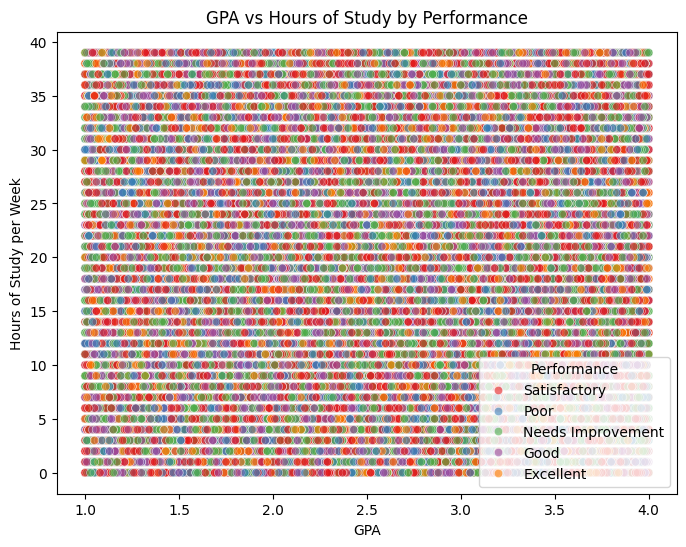

In [ ]:
if "GPA" in df.columns and "Hours of Study per Week" in df.columns:
 plt.figure(figsize=(8,6))
sns.scatterplot(x='GPA', y='Hours of Study per Week', hue='Performance', data=df, palette='Set1', alpha=0.6)
plt.title("GPA vs Hours of Study by Performance")
plt.show()

Why:

-To examine the relationship between GPA and Study Hours.

-Adding color by performance showed group clustering and trends.

What we found:

-Strong positive relationship: more study hours generally improved GPA.

-Excellent performers clustered in high GPA + high study hours region.

-Poor/Needs Improvement performers mostly had low GPA + low study hours.

### Feature Importance (using Random Forest) 


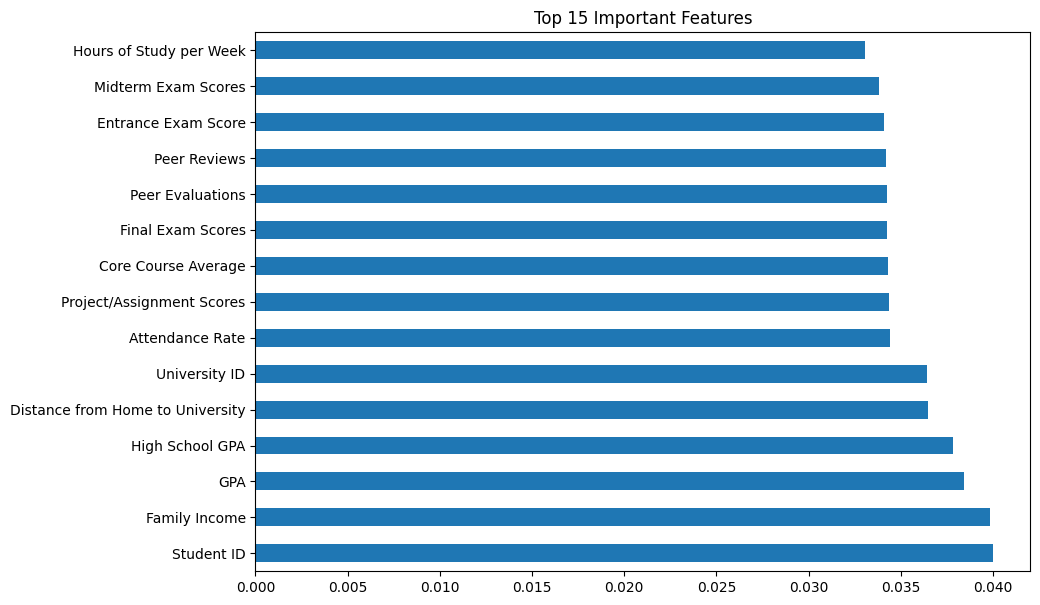

In [ ]:
from sklearn.ensemble import RandomForestClassifier


X = df.drop('Performance', axis=1).copy()
y = df['Performance']

for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = pd.factorize(X[col])[0]

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh', figsize=(10,7))
plt.title("Top 15 Important Features")
plt.show()

Why:

-Identify the strongest predictors of student performance.

What we found:

-Top features include GPA, Attendance, Hours of Study, Mental Health, Family Income.

# 4. KEY FINDINGS & INSIGHTS(Conclusion)

 - Higher GPA and more study hours strongly correlate with better performance.
 - Attendance Rate is a strong predictor of performance.
 - Students with strong mental health and good physical health tend to perform better.
 - Extracurricular activities have a positive relationship with performance (balanced students perform better).
 - Family income shows some influence but is not the strongest predictor.
 - Part-time jobs tend to lower performance slightly due to divided focus.

# 5. RECOMMENDATIONS

 - Encourage consistent study habits and regular attendance.
 - Provide mental health support and counseling services for students.
 - Promote healthy lifestyle and extracurricular involvement.
 - Offer financial aid programs to reduce economic stress on students.
 - Provide tutoring and mentorship programs for students at risk.

# 6. REFERENCES

- Python libraries: pandas, numpy, matplotlib, seaborn, scikit-learn
- Standard EDA practices: univariate, bivariate analysis
- Feature importance using Random Forests